# Percettrone

## Dataset

Generiamo un dataset giocattolo per sperimentare con un classificatore percettrone

In [1]:
import pandas as pd
import numpy as np


def generate_dataset(n, dim, threshold=0.75):
    # Generate n points in dim-dimensional space
    points = np.random.rand(n, dim)

    # Create a DataFrame from the points
    df = pd.DataFrame(points)

    # Assign column names
    df.columns = ['x{}'.format(i) for i in range(dim)]

    df["label"] = np.where(df.sum(axis=1) < threshold, 0, 1)

    return df

In [2]:
df = generate_dataset(1000, 2, 0.75)

## Dataset exploration

In [3]:
df.head()

,x0,x1,label
0,0.321091,0.014695,0
1,0.262499,0.414606,0
2,0.917734,0.883540,1
3,0.885924,0.464617,1
4,0.542907,0.719259,1


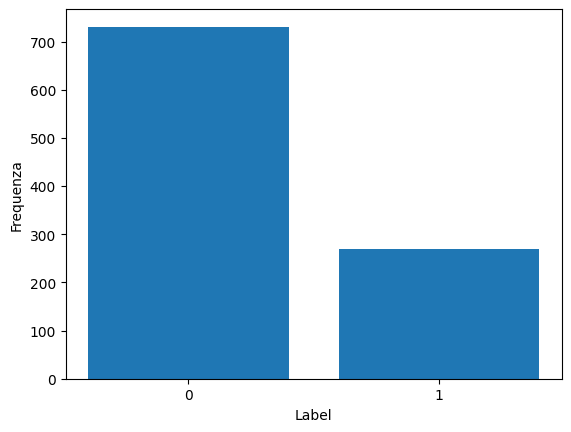

In [4]:
import matplotlib.pyplot as plt

plt.bar(df["label"].unique(), df["label"].value_counts())
plt.ylabel("Frequenza")
plt.xlabel("Label")
plt.xticks([0, 1])
plt.show()

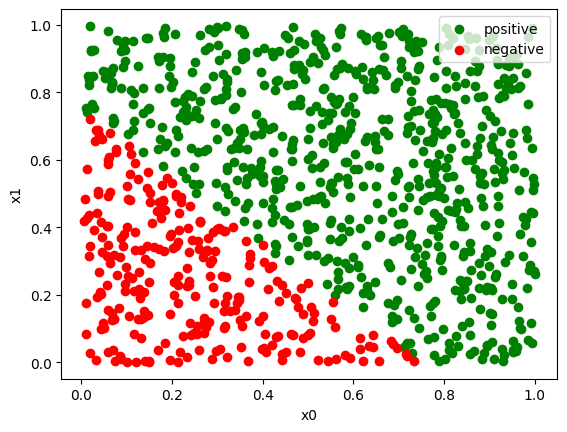

In [5]:
# dividiamo il DataFrame in due sotto-DataFrame in base alla label
df_pos = df[df['label'] == 1]
df_neg = df[df['label'] == 0]

# plot degli scatter plot per i due sotto-DataFrame
fig, ax = plt.subplots()
ax.scatter(df_pos['x0'], df_pos['x1'], c='green', label='positive')
ax.scatter(df_neg['x0'], df_neg['x1'], c='red', label='negative')

ax.legend()
ax.set_xlabel('x0')
ax.set_ylabel('x1')

plt.show()

In questo laboratorio dovrai implementare il percettrone, seguendo questo pseudocodice:
<br><br>

**def** funzione(data, threshold) {

1. Initialize the weights: w0=-threshold, w1,w2 random

2. Set a control variable for convergence

3. Check convergency: all instances shluld be correctly classified.

  3a. Adjust weights for misclassified instances

4. return weights

}

In [7]:
import random

def classify(x, weights):
    if sum(x * weights) >= 0:
        return 1
    else:
        return -1

def funzione(data, threshold):

    labels = df.label
    obs = df.drop("label", axis=1)

    # 1
    weights = (-threshold, random.random())

    # 2
    missclassified = True

    # 3
    while missclassified:
        missclassified = False
        for i, o in iter(obs):
            if labels[i] * classify(o, weights) <= 0:
                weights = weights + labels[i] * o
                missclassified = True

    return weights

In [8]:
funzione(df, 0.75)
# TODO: non worka

KeyError: ignored